In [323]:
# Importing all required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
# Reading the COVID cases and vaccination datasets

covid_cases_usa_df=pd.read_csv('usa_covid_cases.csv')
covid_vaccinations_df=pd.read_csv('covid19_vaccinations_usa.csv')

In [325]:
covid_cases_usa_df.head()

,submission_date,state,state_name,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,8/8/22,RMI,RMI,76,76.0,0.0,6,0,0,0.0,0.0,0,0,8/9/22 13:12,Agree,Agree
1,8/8/22,KS,Kansas,841542,629231.0,212311.0,0,0,8970,NaN,NaN,0,0,8/9/22 13:12,Agree,NaN
2,8/8/22,HI,Hawaii,321378,NaN,NaN,0,0,1580,NaN,NaN,0,0,8/9/22 13:12,Not agree,Not agree
3,8/8/22,AK,Alaska,273674,NaN,NaN,0,0,1275,NaN,NaN,0,0,8/9/22 13:12,NaN,NaN
4,8/8/22,WV,West Virginia,563384,438504.0,124880.0,2109,756,7188,NaN,NaN,4,0,8/9/22 13:12,Agree,Not agree


In [326]:
# Dropping the columns not required for the analysis
covid_cases_usa_df=covid_cases_usa_df.drop(['prob_cases','pnew_case','prob_death','pnew_death','created_at','consent_cases','consent_deaths','conf_death','conf_cases'], axis=1)

In [327]:
covid_cases_usa_df.head()

,submission_date,state,state_name,tot_cases,new_case,tot_death,new_death
0,8/8/22,RMI,RMI,76,6,0,0
1,8/8/22,KS,Kansas,841542,0,8970,0
2,8/8/22,HI,Hawaii,321378,0,1580,0
3,8/8/22,AK,Alaska,273674,0,1275,0
4,8/8/22,WV,West Virginia,563384,2109,7188,4


In [328]:
covid_vaccinations_df.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf
0,8/10/22,32,MT,2195295,106200,904000,1180695,4400.0,0,205402,...,1664501,1662263.0,1616543,1532423,555409,62106,701712,898203,19.0,2461
1,8/10/22,32,DC,2113905,71900,752680,1288025,1300.0,0,299526,...,1656528,1642605.0,1586657,1517179,311693,38730,604384,1011234,49.0,2131
2,8/10/22,32,NY,50018095,1924400,17752980,30332115,8600.0,0,257115,...,40852886,40772980.0,39406708,36971149,9477406,1447622,14791468,24585247,347.0,28202
3,8/10/22,32,MA,18560570,625700,7086280,10845390,3200.0,0,269286,...,15679355,15610852.0,14968695,13985789,3752104,407040,6161579,9110211,48.0,477
4,8/10/22,32,NJ,24153215,990600,8713740,14431375,17500.0,0,271929,...,18006683,17970659.0,17322264,16120639,4217928,581220,6798631,10626083,235.0,514


In [329]:
# Dropping the columns not required for the analysis
covid_vaccinations_df=covid_vaccinations_df.drop(['MMWR_week'], axis=1)

In [330]:
# In this Dataset, we have details about total country i.e., US vaccinations as well along with the states, we will remove that as we dont want them
covid_vaccinations_df.drop(covid_vaccinations_df.loc[covid_vaccinations_df['Location']=='US'].index, inplace=True)

In [331]:
covid_vaccinations_df.head()

,Date,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf
0,8/10/22,MT,2195295,106200,904000,1180695,4400.0,0,205402,217869.0,...,1664501,1662263.0,1616543,1532423,555409,62106,701712,898203,19.0,2461
1,8/10/22,DC,2113905,71900,752680,1288025,1300.0,0,299526,320104.0,...,1656528,1642605.0,1586657,1517179,311693,38730,604384,1011234,49.0,2131
2,8/10/22,NY,50018095,1924400,17752980,30332115,8600.0,0,257115,272927.0,...,40852886,40772980.0,39406708,36971149,9477406,1447622,14791468,24585247,347.0,28202
3,8/10/22,MA,18560570,625700,7086280,10845390,3200.0,0,269286,284012.0,...,15679355,15610852.0,14968695,13985789,3752104,407040,6161579,9110211,48.0,477
4,8/10/22,NJ,24153215,990600,8713740,14431375,17500.0,0,271929,288655.0,...,18006683,17970659.0,17322264,16120639,4217928,581220,6798631,10626083,235.0,514


In [332]:
#Removing Null values in both the datasets
covid_cases_usa_df.dropna(inplace=True)

In [333]:
covid_vaccinations_df.head()

,Date,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf
0,8/10/22,MT,2195295,106200,904000,1180695,4400.0,0,205402,217869.0,...,1664501,1662263.0,1616543,1532423,555409,62106,701712,898203,19.0,2461
1,8/10/22,DC,2113905,71900,752680,1288025,1300.0,0,299526,320104.0,...,1656528,1642605.0,1586657,1517179,311693,38730,604384,1011234,49.0,2131
2,8/10/22,NY,50018095,1924400,17752980,30332115,8600.0,0,257115,272927.0,...,40852886,40772980.0,39406708,36971149,9477406,1447622,14791468,24585247,347.0,28202
3,8/10/22,MA,18560570,625700,7086280,10845390,3200.0,0,269286,284012.0,...,15679355,15610852.0,14968695,13985789,3752104,407040,6161579,9110211,48.0,477
4,8/10/22,NJ,24153215,990600,8713740,14431375,17500.0,0,271929,288655.0,...,18006683,17970659.0,17322264,16120639,4217928,581220,6798631,10626083,235.0,514


Histogram

Text(0.5, 1.0, 'Total Number of Janssen doses administered')

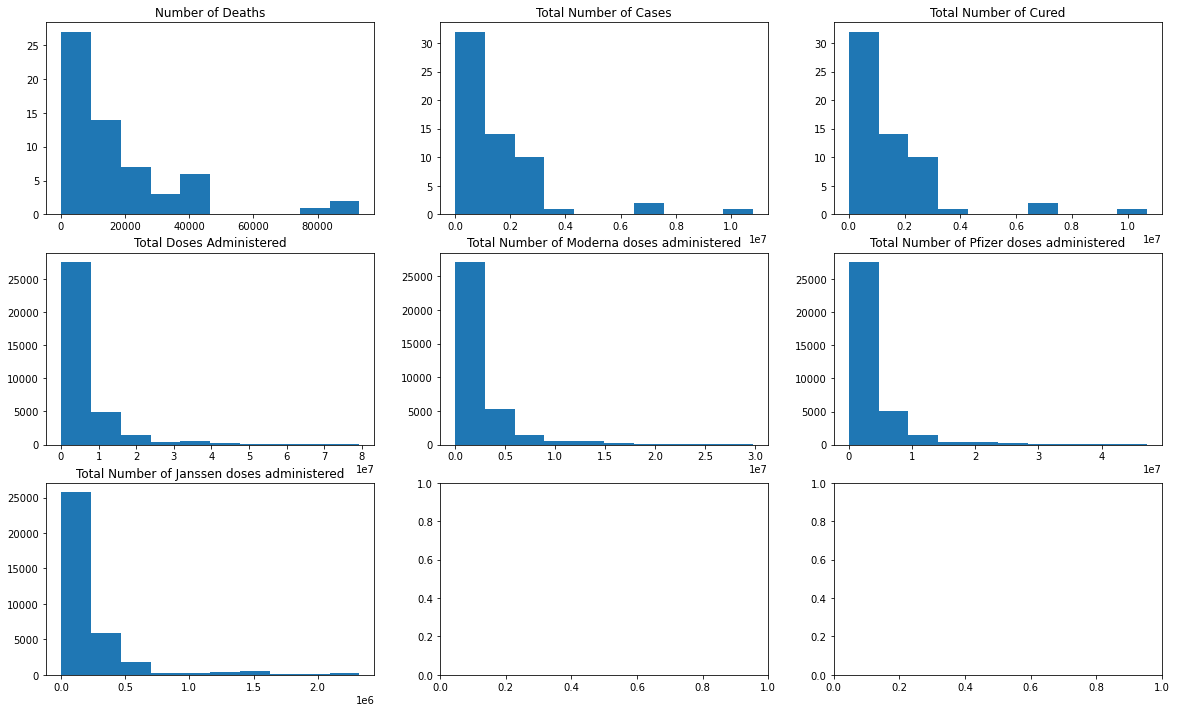

In [334]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

axes[0,0].hist(covid_cases_usa_df['tot_death'])
axes[0,0].set_title("Number of Deaths")

axes[0,1].hist(covid_cases_usa_df['tot_cases'])
axes[0,1].set_title("Total Number of Cases")

axes[0,2].hist(covid_cases_usa_df['tot_cases']-covid_cases_usa_df['tot_death'])
axes[0,2].set_title("Total Number of Cured")

axes[1,0].hist(covid_vaccinations_df['Administered'])
axes[1,0].set_title("Total Doses Administered")

axes[1,1].hist(covid_vaccinations_df['Administered_Moderna'])
axes[1,1].set_title("Total Number of Moderna doses administered")

axes[1,2].hist(covid_vaccinations_df['Administered_Pfizer'])
axes[1,2].set_title("Total Number of Pfizer doses administered")

axes[2,0].hist(covid_vaccinations_df['Administered_Janssen'])
axes[2,0].set_title("Total Number of Janssen doses administered")

# Descriptive characteristics

In [335]:
#Info of USA covid cases
covid_cases_usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  60 non-null     object
 1   state            60 non-null     object
 2   state_name       60 non-null     object
 3   tot_cases        60 non-null     int64 
 4   new_case         60 non-null     int64 
 5   tot_death        60 non-null     int64 
 6   new_death        60 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 3.4+ KB


In [336]:
#Describe for USA covid cases
covid_cases_usa_df.describe()

,tot_cases,new_case,tot_death,new_death
count,6.000000e+01,60.000000,60.000000,60.000000
mean,1.535606e+06,1767.750000,17153.083333,4.683333
std,1.908157e+06,3784.005467,20404.294875,10.857305
min,7.600000e+01,0.000000,0.000000,0.000000
25%,2.983075e+05,0.000000,2881.000000,0.000000
50%,8.986555e+05,400.000000,11513.000000,0.000000
75%,1.979259e+06,1943.750000,21965.250000,6.000000
max,1.079692e+07,25639.000000,93056.000000,73.000000


In [337]:
#Mean of USA covid cases
covid_cases_usa_df['tot_cases'].mean()

1535606.2666666666

In [338]:
#Mode of USA covid cases
covid_cases_usa_df['tot_cases'].mode()

0           76
1         5308
2         6850
3         7952
4        12866
5        22016
6        56226
7       128726
8       163915
9       171322
10      251860
11      259741
12      273674
13      277925
14      296992
15      298746
16      321378
17      340241
18      392368
19      482245
20      521060
21      563384
22      598395
23      826445
24      832229
25      841542
26      860321
27      860734
28      875939
29      886062
30      911249
31     1015442
32     1140513
33     1191962
34     1392517
35     1445283
36     1490393
37     1578508
38     1601006
39     1608623
40     1637108
41     1748594
42     1795145
43     1847824
44     1977503
45     1984528
46     2211463
47     2225377
48     2621249
49     2692485
50     2758072
51     2778580
52     2976027
53     3022204
54     3109238
55     3119129
56     3604149
57     6884224
58     7534525
59    10796918
Name: tot_cases, dtype: int64

In [339]:
#Tail of USA covid cases
covid_cases_usa_df.tail()

,submission_date,state,state_name,tot_cases,new_case,tot_death,new_death
55,8/8/22,IA,Iowa,826445,1630,9817,0
56,8/8/22,TX,Texas,7534525,25639,87946,73
57,8/8/22,ND,North Dakota,259741,471,2325,0
58,8/8/22,IN,Indiana,1847824,4202,24189,5
59,8/8/22,MA,Massachusetts,1977503,0,21224,0


In [340]:
#Median of USA covid cases
covid_cases_usa_df['tot_cases'].median()

898655.5

In [341]:
#Info of USA covid vaccinations
covid_vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35433 entries, 0 to 35991
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         35433 non-null  object 
 1   Location                     35433 non-null  object 
 2   Distributed                  35433 non-null  int64  
 3   Distributed_Janssen          35433 non-null  int64  
 4   Distributed_Moderna          35433 non-null  int64  
 5   Distributed_Pfizer           35433 non-null  int64  
 6   Distributed_Novavax          189 non-null    float64
 7   Distributed_Unk_Manuf        35433 non-null  int64  
 8   Dist_Per_100K                35433 non-null  int64  
 9   Distributed_Per_100k_5Plus   34992 non-null  float64
 10  Distributed_Per_100k_12Plus  35433 non-null  int64  
 11  Distributed_Per_100k_18Plus  35433 non-null  int64  
 12  Distributed_Per_100k_65Plus  35433 non-null  int64  
 13  Administered    

In [342]:
#Describtion for USA covid vaccinations
covid_vaccinations_df.describe()

,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,...,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf
count,3.543300e+04,3.543300e+04,3.543300e+04,3.543300e+04,189.000000,3.543300e+04,35433.000000,34992.000000,35433.000000,35433.000000,...,3.543300e+04,3.499200e+04,3.543300e+04,3.543300e+04,3.543300e+04,3.543300e+04,3.543300e+04,3.543300e+04,189.000000,35433.000000
mean,7.666382e+06,3.514721e+05,2.887177e+06,4.311504e+06,4887.830688,1.084365e+03,124549.717777,82614.074846,131638.409392,157697.024215,...,5.901606e+06,3.685087e+06,5.313214e+06,5.398676e+06,1.557538e+06,1.990312e+05,2.300674e+06,3.396272e+06,129.449735,5628.539554
std,1.245119e+07,5.568577e+05,4.476235e+06,7.535750e+06,8484.021907,1.899030e+04,75058.970360,105262.001972,102225.188438,100417.993634,...,9.309003e+06,8.762881e+06,9.197700e+06,8.519315e+06,2.282634e+06,3.302361e+05,3.514107e+06,5.476997e+06,218.537435,16305.232870
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.985400e+05,1.660000e+04,1.462200e+05,1.811100e+05,100.000000,0.000000e+00,70092.000000,0.000000,0.000000,78290.000000,...,6.609130e+05,0.000000e+00,0.000000e+00,4.537640e+05,3.925000e+04,1.022500e+04,2.899130e+05,3.500570e+05,3.000000,41.000000
50%,3.458130e+06,1.602000e+05,1.353760e+06,1.856520e+06,1300.000000,0.000000e+00,130527.000000,0.000000,151464.000000,167116.000000,...,2.727913e+06,0.000000e+00,1.881580e+06,2.481976e+06,7.476160e+05,8.436600e+04,1.133414e+06,1.488560e+06,18.000000,591.000000
75%,9.058875e+06,4.404000e+05,3.660440e+06,4.950675e+06,5300.000000,0.000000e+00,186294.000000,198987.750000,218772.000000,241233.000000,...,7.325604e+06,3.792829e+06,6.864134e+06,6.753143e+06,2.095925e+06,2.498370e+05,2.818646e+06,4.268126e+06,127.000000,3080.000000
max,1.068552e+08,3.756100e+06,3.578618e+07,7.372004e+07,58700.000000,1.063700e+06,320597.000000,336247.000000,363098.000000,393202.000000,...,7.931974e+07,7.903249e+07,7.590989e+07,7.037129e+07,1.734026e+07,2.325039e+06,2.978194e+07,4.719918e+07,1176.000000,155627.000000


In [343]:
#Mean of USA covid vaccinations
covid_vaccinations_df['Administered'].mean()

5901606.466232044

In [344]:
#Mode of USA covid vaccinations
covid_vaccinations_df['Administered'].mode()

0    0
Name: Administered, dtype: int64

In [345]:
#Median of USA covid vaccinations
covid_vaccinations_df['Administered'].median()

2727913.0

In [346]:
#tail of USA covid vaccinations
covid_vaccinations_df.tail()

,Date,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,Administered,Administered_5Plus,Administered_12Plus,Administered_18Plus,Administered_65Plus,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf
35986,12/13/20,AS,3900,0,0,0,NaN,0,7003,0.0,...,0,0.0,0,0,0,0,0,0,NaN,0
35987,12/13/20,VI,975,0,0,0,NaN,0,931,0.0,...,0,0.0,0,0,0,0,0,0,NaN,0
35988,12/13/20,MP,4875,0,0,0,NaN,0,8570,0.0,...,0,0.0,0,0,0,0,0,0,NaN,0
35990,12/13/20,GU,3900,0,0,0,NaN,0,2353,0.0,...,0,0.0,0,0,0,0,0,0,NaN,0
35991,12/13/20,LTC,0,0,0,0,NaN,0,0,0.0,...,0,0.0,0,0,0,0,0,0,NaN,0


# PMF

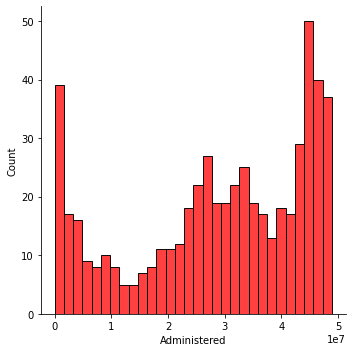

In [347]:
sns.displot(covid_vaccinations_df['Administered'].loc[covid_vaccinations_df['Location']=='TX'],bins=30,kde=False,color='red')

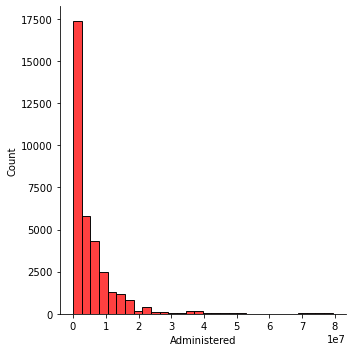

In [348]:
sns.displot(covid_vaccinations_df['Administered'].loc[covid_vaccinations_df['Location']!='TX'],bins=30,kde=False,color='red')

# CDF

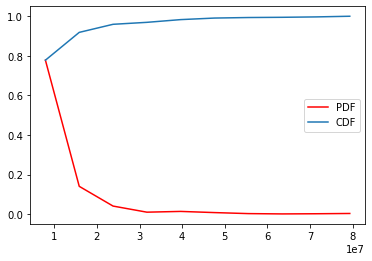

In [349]:
# No of Data points
N = len(covid_vaccinations_df)
  
# initializing random values
data = np.random.randn(N)
  
# getting data of the histogram
count, bins_count = np.histogram(covid_vaccinations_df['Administered'], bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

# Analytical Distribution

<AxesSubplot:>

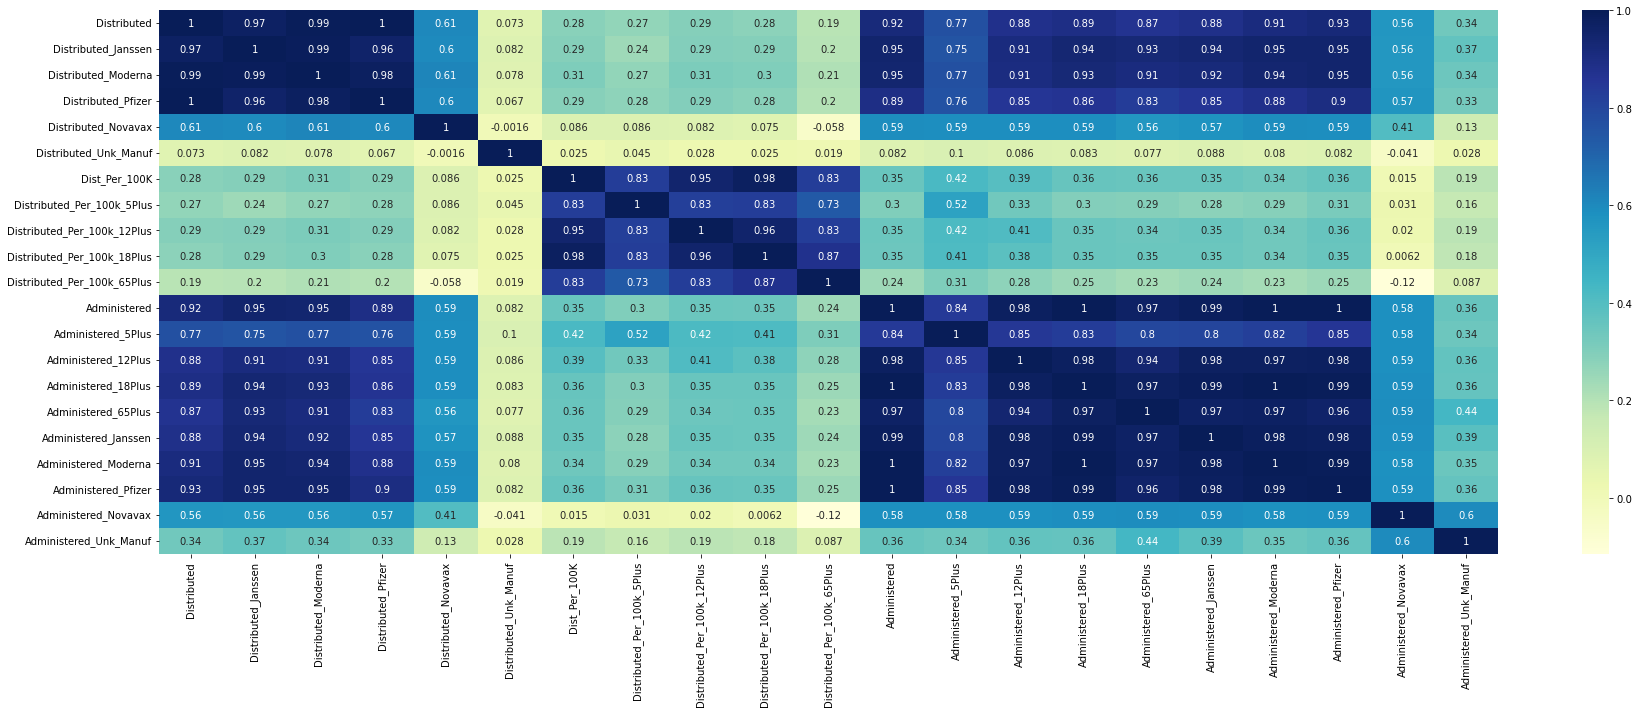

In [350]:
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(covid_vaccinations_df.corr(),cmap='YlGnBu',annot=True)

# Scatter plots comparing two variables, Covariance, Pearson’s correlation, and Non-Linear Relationships

In [351]:
import thinkstats2
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [352]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [353]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [354]:
pfizer=covid_vaccinations_df['Administered_Pfizer']
moderna=covid_vaccinations_df['Administered_Moderna']
print('Correlation',Corr(pfizer,moderna))
print("Spearman's Correlation",SpearmanCorr(pfizer,moderna))

Correlation 0.993772513364739
Spearman's Correlation 0.9891336231277071


/var/folders/p0/pjkt4x3j3x3fcxxknylhjcq00000gn/T/ipykernel_60984/4092143021.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gp=[group.mean() for i, group in groups]


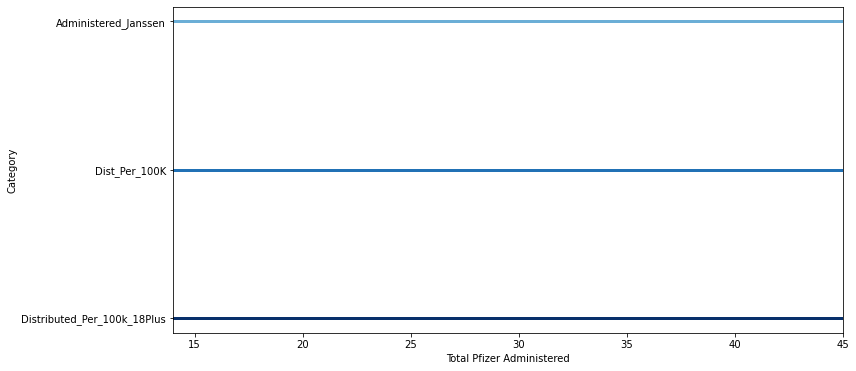

In [355]:
import thinkplot
def BinPercentiles(df):
    bins=np.arange(10,48,3)
    indices=np.digitize(df['Administered_Pfizer'],bins)
    groups=df.groupby(indices)
    
    gp=[group.mean() for i, group in groups]
    cdfs=[thinkstats2.Cdf(group) for i, group in groups]
    
    thinkplot.PrePlot(3)
    for percent in [75,50,25]:
        cd=[cdf.Percentile(percent) for cdf in cdfs]
        label='%dth' % percent
        thinkplot.Plot(gp,cd)
        thinkplot.Config(xlabel="Total Pfizer Administered",ylabel="Category",xlim=[14,45],legend=True)

fig, ax = plt.subplots(figsize=(12,6))
BinPercentiles(covid_vaccinations_df)

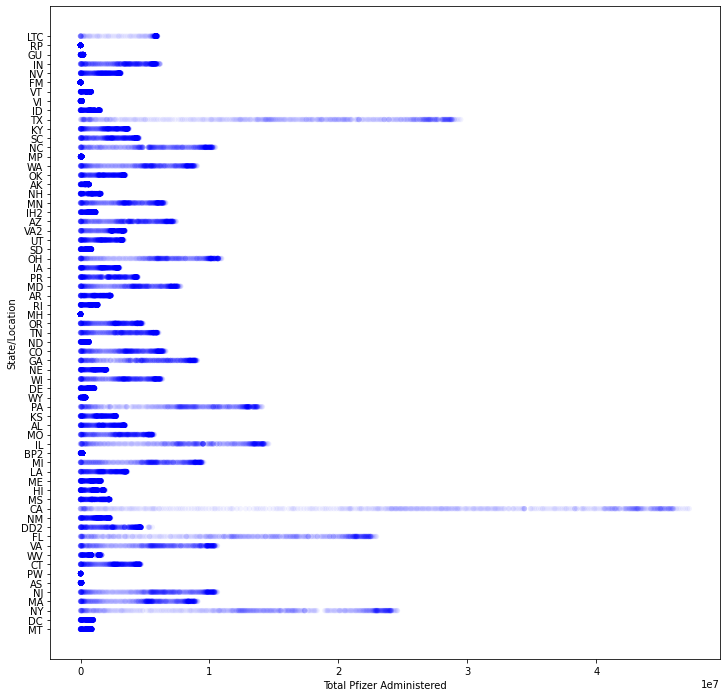

In [356]:
fig, ax = plt.subplots(figsize=(12,12))
thinkplot.Scatter(covid_vaccinations_df['Administered_Pfizer'],covid_vaccinations_df['Location'],alpha=0.05)
thinkplot.Config(xlabel="Total Pfizer Administered",ylabel="State/Location")

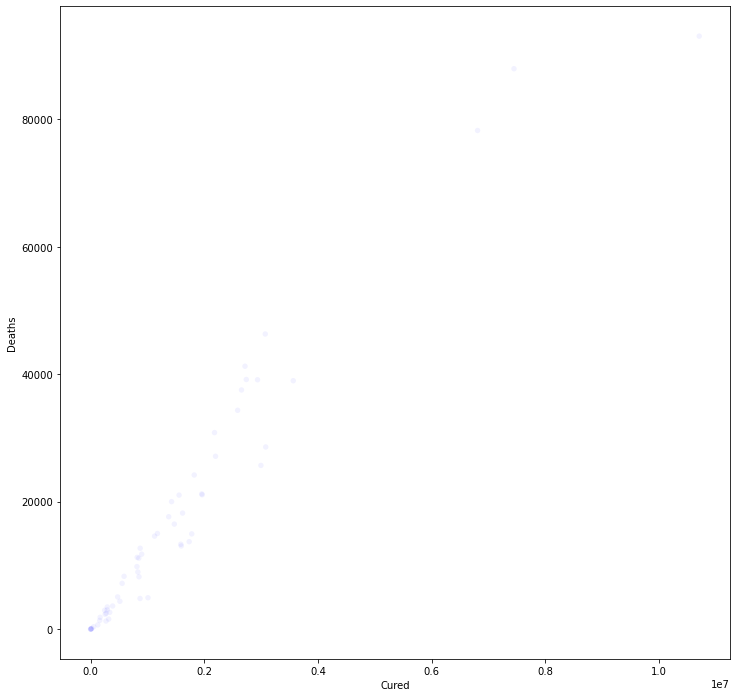

In [357]:
fig, ax = plt.subplots(figsize=(12,12))
cured = covid_cases_usa_df['tot_cases']-covid_cases_usa_df['tot_death']
thinkplot.Scatter(cured,covid_cases_usa_df['tot_death'],alpha=0.05)
thinkplot.Config(xlabel="Cured",ylabel="Deaths")

# Test

In [362]:
from sklearn import model_selection

target=covid_cases_usa_df['tot_cases']
feats=covid_cases_usa_df.drop(['tot_cases','submission_date','state','state_name'],axis=1)
feat_train,feat_test,target_train,target_test=model_selection.train_test_split(feats,target,test_size=0.3,random_state=101)

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
logmodel = LogisticRegression()
logmodel.fit(feat_train,target_train)

/Users/somashekarvayuvegula/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [366]:
predictions = logmodel.predict(feat_test)

In [367]:
from sklearn.metrics import classification_report

In [368]:
print(classification_report(target_test,predictions))

              precision    recall  f1-score   support

        6850       0.00      0.00      0.00       1.0
        7952       0.00      0.00      0.00       1.0
      171322       0.00      0.00      0.00       1.0
      259741       0.00      0.00      0.00       1.0
      277925       0.00      0.00      0.00       1.0
      321378       0.00      0.00      0.00       1.0
      340241       0.00      0.00      0.00       1.0
      392368       0.00      0.00      0.00       1.0
      482245       0.00      0.00      0.00       1.0
      841542       0.00      0.00      0.00       1.0
      875939       0.00      0.00      0.00       1.0
     1015442       0.00      0.00      0.00       1.0
     1490393       0.00      0.00      0.00       1.0
     1608623       0.00      0.00      0.00       0.0
     1795145       0.00      0.00      0.00       1.0
     1847824       0.00      0.00      0.00       0.0
     1984528       0.00      0.00      0.00       0.0
     2225377       0.00    

/Users/somashekarvayuvegula/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/somashekarvayuvegula/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/somashekarvayuvegula/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st